In [1]:
'''采用自组CNN模型进行猫狗图片二分类'''
import os, shutil
from keras import layers
from keras import models
from keras import optimizersplt.plot(range(len(lrs)), loss)plt.plot(range(len(lrs)), loss)plt.plot(range(len(lrs)), loss)plt.plot(range(len(lrs)), loss)
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# 原始数据集的路径
original_dataset_dir = '/home/Howie/alldataset/catsdogsdataset'

# 项目数据集存放路径
base_dir = '/home/Howie/kerasproject/catsdogs_classification/dataset'

# 创建训练集、验证集、测试集目录
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

# 创建猫狗目录
train_cats_dir = os.path.join(train_dir, 'cats')
validation_cats_dir = os.path.join(validation_dir, 'cats')
test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(train_cats_dir)
# os.mkdir(validation_cats_dir)
# os.mkdir(test_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(train_dogs_dir)
# os.mkdir(validation_dogs_dir)
# os.mkdir(test_dogs_dir)

#数据集复制
fnames = ['cat.{}.jpg'.format(i) for i in range(2000)]
for fname in fnames:
    scr = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(scr, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(2000, 4000)]
for fname in fnames:
    scr = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(scr, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(4000, 5000)]
for fname in fnames:
    scr = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(scr, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(2000)]
for fname in fnames:
    scr = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(scr, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(2000, 4000)]
for fname in fnames:
    scr = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(scr, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(4000, 5000)]
for fname in fnames:
    scr = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(scr, dst)

In [4]:
# 建立CNN模型
def generate_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu',
    input_shape=(150,150,3)))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D(2,2))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    # model.summary()
    return model


In [5]:
# 图像生成器
train_dategen = ImageDataGenerator(rescale=1./255)
validation_dategen = ImageDataGenerator(rescale=1./255)

train_generator = train_dategen.flow_from_directory(train_dir, 
 target_size=(150,150), batch_size=128, class_mode='binary')
validation_generator = validation_dategen.flow_from_directory(validation_dir,
 target_size=(150,150), batch_size=128, class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found 4000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
data batch shape: (128, 150, 150, 3)
labels batch shape: (128,)


In [7]:

acc, val_acc, loss, val_loss = [], [], [], []
for i in range(10):
    print("Learning with rate of {}".format(1e-3/(2**i)))
    # 选择优化器
    model = generate_model() 
    model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-3/(2**i)),
    loss='binary_crossentropy', metrics=['acc'])
    # 训练模型
    history_bin = model.fit_generator(train_generator, 
    epochs=10, validation_data=validation_generator, validation_steps=32)

    
    acc = acc + history_bin.history['acc'] 
    val_acc = val_acc + history_bin.history['val_acc'] 
    loss = loss + history_bin.history['loss']
    val_loss = val_loss + history_bin.history['val_loss'] 
    
    #loss.append( history_bin.history['loss'][-1] )


#plt.plot(range(len(lrs)), loss)
# 保存模型
model.save('/home/Howie/kerasproject/catsdogs_classification/cats_and_dogs_1.h5')# 训练模型


Learning with rate of 0.001
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
32/32 [==============================] - 36s 1s/step - loss: 0.9440 - acc: 0.5170 - val_loss: 0.6884 - val_acc: 0.5173
Epoch 2/10
32/32 [==============================] - 36s 1s/step - loss: 0.6941 - acc: 0.5353 - val_loss: 0.6687 - val_acc: 0.6143
Epoch 3/10
32/32 [==============================] - 36s 1s/step - loss: 0.7702 - acc: 0.5550 - val_loss: 0.6748 - val_acc: 0.6352
Epoch 4/10
32/32 [==============================] - 36s 1s/step - loss: 0.6664 - acc: 0.6143 - val_loss: 0.7069 - val_acc: 0.5957
Epoch 5/10
32/32 [==============================] - 35s 1s/step - loss: 0.6689 - acc: 0.6108 - val_loss: 0.6447 - val_acc: 0.6518
Epoch 6/10
32/32 [==============================] - ETA: 0s - loss: 0.6640 - acc: 0.6323

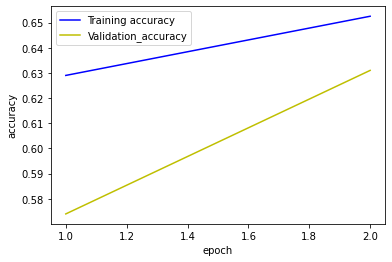

In [11]:
# 训练过程可视化
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = range(1, len(acc)+1)


plt.plot(epoch, acc, 'b', label='Training accuracy')
plt.plot(epoch, val_acc, 'y', label='Validation_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend()